In [1]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import matplotlib.cm 
import matplotlib.colors
from matplotlib.patches import Patch
plt.rcParams['font.family'] = 'Arial'

from selenobot.files import FASTAFile
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import re
from fabapi import Query
from tqdm import tqdm 

%load_ext autoreload
%autoreload 2

In [5]:
def load_results(type_:str, file_names:list=['test.h5', 'val.h5'], n_classes:int=2, results_dir:str='../data/results') -> pd.DataFrame:
    
    results = []
    model_name = f'binary_model_{type_}' if (n_classes == 2) else f'ternary_model_{type_}' 
    print(f'load_results: Loading results for {type_} encodings.')

    for file_name in file_names:
        results_file_name = f'predict_{os.path.splitext(file_name)[0]}_{model_name}.csv'
        results_path = os.path.join(results_dir, results_file_name)
        results_df = pd.read_csv(results_path, index_col=0)
        results_df['file_name'] = file_name

        if 'label' in results_df.columns:
            acc = np.round(balanced_accuracy_score(results_df.label.values, results_df.prediction.values), 3)
            print(f'load_results: Accuracy of model {model_name} on {file_name}:', acc)
        else:
            print(f'load_results: No label for {type_}.')
            
        results.append(results_df)

    return pd.concat(results, axis=0)

In [7]:
types = ['len', 'aa_1mer', 'aa_2mer', 'aa_3mer', 'plm']

binary_results = {type_:load_results(type_, n_classes=2) for type_ in types}
ternary_results = {type_:load_results(type_, n_classes=3) for type_ in types}

load_results: Loading results for len encodings.
load_results: Accuracy of model binary_model_len on test.h5: 0.791
load_results: Accuracy of model binary_model_len on val.h5: 0.829
load_results: Loading results for aa_1mer encodings.
load_results: Accuracy of model binary_model_aa_1mer on test.h5: 0.778
load_results: Accuracy of model binary_model_aa_1mer on val.h5: 0.793
load_results: Loading results for aa_2mer encodings.
load_results: Accuracy of model binary_model_aa_2mer on test.h5: 0.849
load_results: Accuracy of model binary_model_aa_2mer on val.h5: 0.797
load_results: Loading results for aa_3mer encodings.
load_results: Accuracy of model binary_model_aa_3mer on test.h5: 0.765
load_results: Accuracy of model binary_model_aa_3mer on val.h5: 0.723
load_results: Loading results for plm encodings.
load_results: Accuracy of model binary_model_plm on test.h5: 0.997
load_results: Accuracy of model binary_model_plm on val.h5: 0.996
load_results: Loading results for len encodings.
load_

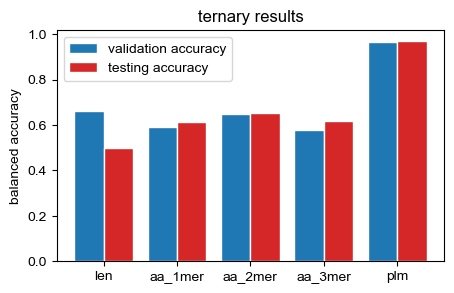

In [13]:
model_type = 'ternary'

fig, ax = plt.subplots(figsize=(5, 3))

positions = np.arange(len(types)) + 1

val_accs, test_accs = [], []

for type_ in types:
    results_df = ternary_results[type_]
    test_results_df = results_df[results_df.file_name == 'test.h5']
    val_results_df = results_df[results_df.file_name == 'val.h5']

    val_acc = balanced_accuracy_score(val_results_df.label.values, val_results_df.prediction.values)
    test_acc = balanced_accuracy_score(test_results_df.label.values, test_results_df.prediction.values)
    val_accs.append(val_acc)
    test_accs.append(test_acc)

bar_width = 0.4
ax.set_xticks(positions + 0.5 * bar_width, labels=types)
ax.set_title(f'{model_type} results')
ax.set_ylabel('balanced accuracy')

ax.bar(positions, val_accs, width=bar_width, color='tab:blue', edgecolor='white')
ax.bar(positions + bar_width, test_accs, width=bar_width, color='tab:red', edgecolor='white')

ax.legend(['validation accuracy', 'testing accuracy'])

plt.show()
